# COMP 424 Assignment 1

## Implement Hillclimbing

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import copy

def find_max(x, y, function, step = 0.01, lower_bound = 0, upper_bound = 10):
    neighbors = [x - step, y - step, x - step, y + step, x + step, y - step, x + step, y + step, x, y - step, x, y + step, x - step, y, x + step, y]
    maxi = function(x , y)
    coordinates = [x , y]
    for index in range(0, len(neighbors) - 1, 2): 
        result = function(neighbors[index], neighbors[index + 1])
        if result > maxi and not(neighbors[index] <= lower_bound or neighbors[index] >= upper_bound or neighbors[index + 1] <= lower_bound or neighbors[index + 1] >= upper_bound):
            maxi = result
            coordinates = [neighbors[index], neighbors[index + 1]]
    return maxi, coordinates

        

## Initialize Functions

In [2]:
def function_one(x, y):
    return np.sin(x / 2) + np.cos(y / 2)

def function_two(x, y):
    return -abs(x - 2) - abs(0.5 * y + 1) + 3

In [3]:
def algorithm(init_x, init_y, function, step_size):
    result_old = find_max(init_x, init_y, function, step_size)
    iteration = 1
    while True:
        result = find_max(result_old[1][0], result_old[1][1], function, step_size)
        if result[1][0] == result_old[1][0] and result[1][1] == result_old[1][1]:
            return {'init_x' : init_x,'init_y': init_y,'max': result[0],'end_x': result[1][0], 'end_y': result[1][1], 'iteration': iteration}
        result_old = result
        iteration += 1
    return None

## Run Algorithm

In [23]:
steps = [0.01, 0.05, 0.1, 0.2]
results = []
graph_plot_std = []
graph_plot_mean = []
coordinates = []
for j in range(0, 100):
    coordinates.append({'x': random.uniform(0, 10), 'y': random.uniform(0, 10)})

for step in steps:
    for i in range(0, 100): 
        result = algorithm(coordinates[i]['x'], coordinates[i]['y'], function_two, step)
        results.append(result)
    frame = pd.DataFrame(data = results)
    graph_plot_std.append(frame.std())
    graph_plot_mean.append(frame.mean())

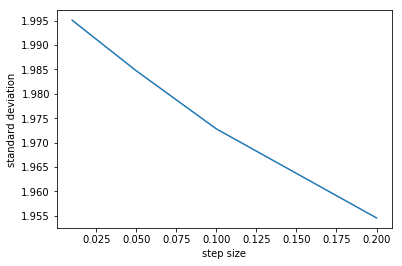

In [24]:
graph_frame_std = pd.DataFrame(index = steps, data = graph_plot_std)
graph_frame_mean = pd.DataFrame(index = steps, data = graph_plot_mean)
plt.xlabel("step size")
plt.ylabel("standard deviation")
plt.plot(steps, graph_frame_mean.get('max'))

In [7]:
frame.mean()

end_x          3.823538
end_y          3.713353
init_x         5.434663
init_y         5.273578
iteration    125.960000
max            1.530248
dtype: float64

In [25]:
graph_frame_std


,end_x,end_y,init_x,init_y,iteration,max
0.01,0.002906,0.002854,2.784694,3.108259,268.005820,0.001954
0.05,0.010383,0.014549,2.777688,3.100440,303.589898,0.012332
0.10,0.018387,0.027190,2.775365,3.097846,283.995875,0.022738
0.20,0.032352,0.050977,2.774205,3.096552,264.448731,0.043059


In [26]:
graph_frame_mean

,end_x,end_y,init_x,init_y,iteration,max
0.01,2.000108,0.004724,4.971408,5.060524,584.540000,1.995068
0.05,1.999758,0.015624,4.971408,5.060524,350.590000,1.984711
0.10,2.000975,0.028257,4.971408,5.060524,253.093333,1.972807
0.20,2.001083,0.047324,4.971408,5.060524,197.040000,1.954560


## Local Beam Search Algorithm

In [10]:
def local_beam_search(function, step = 0.01, beam_width = 2, lower_bound = 0, upper_bound = 10):
    coords = []
    for i in range(0, beam_width):
        coords.append({'x' : random.randint(0, 10), 'y' : random.randint(0, 10)})
    iteration = 0
    neighbors = []
    while True:
        for i in range(0, beam_width):
            neighbors.extend(get_neighbors(coords[i]['x'], coords[i]['y'], function, step, lower_bound, upper_bound))
        
        coords_temp = copy.deepcopy(coords)
        coords.clear()
        max_values = sorted(neighbors, key=lambda k: k['value'], reverse=True) 
        for i in range(0, beam_width):
            coords.append(max_values[i])
        done = True
        for i in range(0, beam_width):
            check = False;
            for j in range(0, beam_width):
                if coords[i]['x'] == coords_temp[j]['x'] and coords[i]['y'] == coords_temp[j]['y']:
                    check = True
                    break
            if not check:
                done = False
                break;
        if done:
            coords[0]['iteration'] = iteration
            return coords[0]
        
        iteration += 1
        neighbors.clear()

In [11]:
def get_neighbors(x, y, function, step, lower_bound, upper_bound):
    results = []
    neighbors = [x, y, x - step, y - step, x - step, y + step, x + step, y - step, x + step, y + step, x, y - step, x, y + step, x - step, y, x + step, y]
    for i in range(0, len(neighbors), 2):
        if neighbors[i] >= lower_bound and neighbors[i] <= upper_bound and neighbors[i + 1] >= lower_bound and neighbors[i + 1] <= upper_bound:
            results.append({'x': neighbors[i], 'y': neighbors[i + 1], 'value': function(neighbors[i], neighbors[i + 1])})
        
    return results

In [12]:
print(local_beam_search(function_two, beam_width = 2))

{'x': 2.000000000000064, 'y': 1.9675233664528946e-14, 'value': 1.9999999999999263, 'iteration': 300}


In [35]:
beam_results = []
beam_widths = [2, 4, 8, 16]
beam_data_std = []
beam_data_mean = []
for width in beam_widths:
    for i in range(0, 100):
        beam_results.append(local_beam_search(function_two, beam_width = 2, step=0.01))

    beam_frame = pd.DataFrame(data = beam_results)
    beam_data_std.append(beam_frame.std())
    beam_data_mean.append(beam_frame.mean())

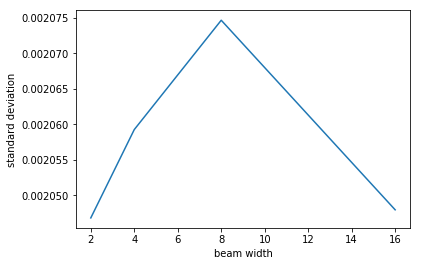

In [36]:
graph_plot_std = pd.DataFrame(index = beam_widths, data = beam_data_std)
graph_plot_mean = pd.DataFrame(index = beam_widths, data = beam_data_mean)
plt.xlabel("beam width")
plt.ylabel("standard deviation")
plt.plot(beam_widths, graph_plot_std.get('value'))

In [32]:
beam_frame.mean()

iteration    291.220000
value          1.711635
x              3.397250
y              3.002700
dtype: float64

In [37]:
graph_plot_std

,iteration,value,x,y
2,279.070886,0.002047,4.666601e-14,0.004094
4,257.911562,0.002059,4.808800e-14,0.004119
8,254.885460,0.002075,4.747623e-14,0.004149
16,252.715599,0.002048,4.702736e-14,0.004096


In [38]:
graph_plot_mean

,iteration,value,x,y
2,478.920,1.998950,2.0,0.002100
4,478.945,1.998925,2.0,0.002150
8,493.620,1.998900,2.0,0.002200
16,493.710,1.998937,2.0,0.002125
